In [26]:
import torch
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable

## 2D Convolutional Operation

In [66]:
B = [[ 1,  3,  1,  3,  5,  4], [ 0,  3,  1,  3,  0,  0], [ 20,  3,  1,  3,  -1,  -1],
     [ 2,  0,  1,  -3,  5,  4], [ -2,  0,  0,  -7,  1,  2], [ 10,  0,  0,  0,  1,  8]]

In [67]:
# here is a 6x6 matrix
A = torch.FloatTensor(B)
# here is a 3x3 filter or kernel
f = torch.FloatTensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

In [68]:
f


 1  0 -1
 1  0 -1
 1  0 -1
[torch.FloatTensor of size 3x3]

In [69]:
A


  1   3   1   3   5   4
  0   3   1   3   0   0
 20   3   1   3  -1  -1
  2   0   1  -3   5   4
 -2   0   0  -7   1   2
 10   0   0   0   1   8
[torch.FloatTensor of size 6x6]

Here is the convolution of $A$ and $f$ which is a 4x4 tensor.

In [80]:
F.conv2d(Variable(A.view(1,1,6,6)),Variable(f.view(1,1,3,3)))

Variable containing:
(0 ,0 ,.,.) = 
  18   0  -1   6
  19   3  -1   0
  18  10  -3 -12
   9  10  -6 -24
[torch.FloatTensor of size 1x1x4x4]

To compute the first element of the output tensor we compute the element wise multiplication of the top 3x3 sub-matrix of $A$ (defined below) and $f$ and then sum the results.

In [72]:
A1 = [ [1,  3,  1], [ 0,  3,  1], [20,  3,  1]]

**Question:** What is the size of the output tensor after a convolution of a $n \times n$ tensor with a $f x f$ filter?

You can check that is $(n - f + 1) \times (n - f + 1)$. That is why we get a 6 - 3+ 1 = 4, that is a $4 \times 4$ tensor.

## Edge detector
Here is an illustration on how the filter `f` can be seeing as an edge detector.

In [75]:
import matplotlib.pyplot as plt

In [82]:
b = [10, 10, 10, 0, 0, 0]
B = np.array([b, b, b, b, b, b])
A = torch.FloatTensor(B)
B

array([[10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0]])

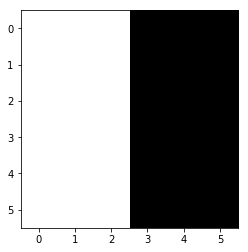

In [77]:
plt.imshow(B, cmap=plt.cm.gray)

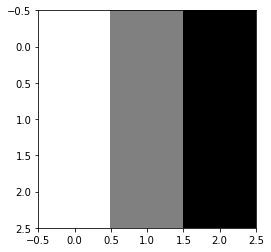

In [78]:
plt.imshow(f, cmap=plt.cm.gray)

In [85]:
C = F.conv2d(Variable(A.view(1,1,6,6)),Variable(f.view(1,1,3,3)))
C

Variable containing:
(0 ,0 ,.,.) = 
   0  30  30   0
   0  30  30   0
   0  30  30   0
   0  30  30   0
[torch.FloatTensor of size 1x1x4x4]

In [96]:
D = C.data
D = D.numpy()
D = D.reshape((4,4))

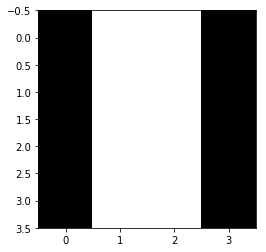

In [97]:
plt.imshow(D, cmap=plt.cm.gray)